In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df=pd.read_csv(r"C:\Users\DELL XPS\Desktop\skillenable\ML\insurance.csv")

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

C:\Users\DELL XPS\AppData\Local\Temp\ipykernel_32076\2819014442.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


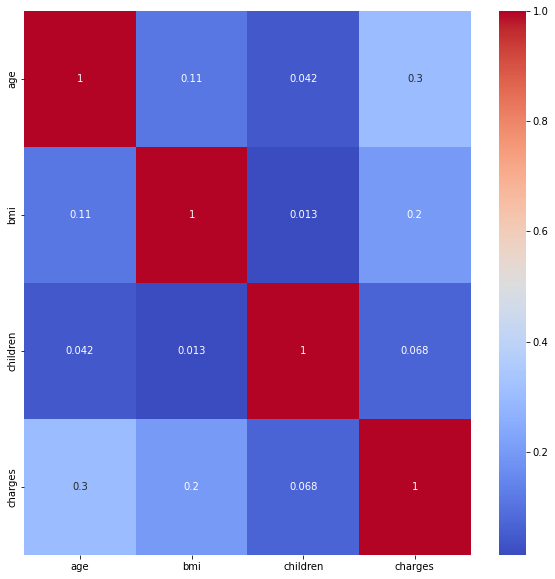

In [10]:
plt.figure(figsize=(10,10))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['sex']=encoder.fit_transform(df['sex'])
df['smoker']=encoder.fit_transform(df['smoker'])
df['region']=encoder.fit_transform(df['region'])

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


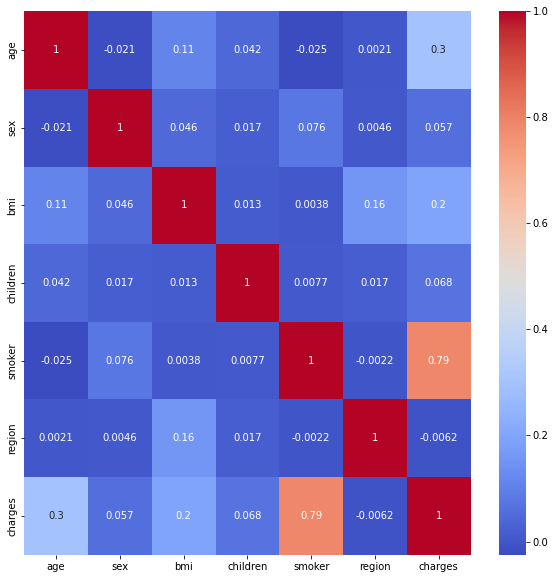

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [14]:
x=df.drop(['charges'],axis=1)
y=df['charges']
print(x)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [19]:
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
lr=LinearRegression()


In [22]:
dtr.fit(x_train,y_train)
y_pred_dtr=dtr.predict(x_test)
dtr.score(x_test,y_test)

0.7147387393280733

In [23]:
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
rfr.score(x_test,y_test)

0.8371362506411855

In [24]:
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
lr.score(x_test,y_test)

0.7346272797892753

In [25]:
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor

In [27]:
etr=ExtraTreesRegressor()
gbr=GradientBoostingRegressor()

In [28]:
etr.fit(x_train,y_train)
y_pred_etr=etr.predict(x_test)
etr.score(x_test,y_test)

0.8369895310691476

In [29]:
gbr.fit(x_train,y_train)
y_pred_gbr=gbr.predict(x_test)
gbr.score(x_test,y_test)

0.8501893228477609

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
mse=mean_squared_error(y_test,y_pred_gbr)
r2=r2_score(y_test,y_pred_gbr)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 22556390.340707127
R-squared: 0.8501893228477609
